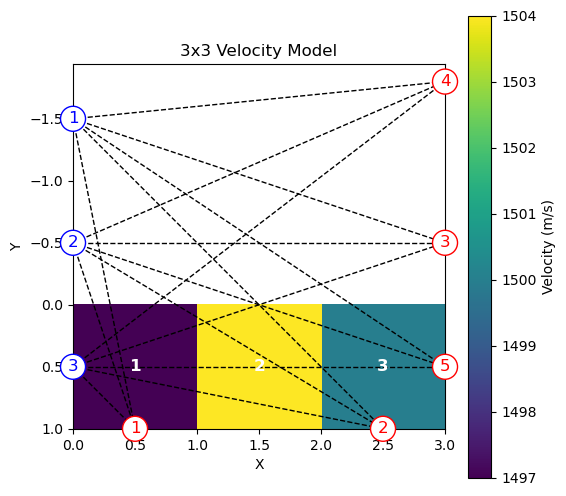

Receiver 1 at (0.5, 1) from Source 1 at (0, -1.5):
[[1.0198039 0.        0.       ]]
Receiver 2 at (2.5, 1) from Source 1 at (0, -1.5):
[[0.         0.70710678 0.70710678]]
Receiver 3 at (3, -0.5) from Source 1 at (0, -1.5):
[[0. 0. 0.]]
Receiver 4 at (3, -1.8) from Source 1 at (0, -1.5):
[[0. 0. 0.]]
Receiver 5 at (3, 0.5) from Source 1 at (0, -1.5):
[[0.         0.         0.90138782]]
Receiver 1 at (0.5, 1) from Source 2 at (0, -0.5):
[[1.05409255 0.         0.        ]]
Receiver 2 at (2.5, 1) from Source 2 at (0, -0.5):
[[0.19436506 1.16619038 0.58309519]]
Receiver 3 at (3, -0.5) from Source 2 at (0, -0.5):
[[0. 0. 0.]]
Receiver 4 at (3, -1.8) from Source 2 at (0, -0.5):
[[0. 0. 0.]]
Receiver 5 at (3, 0.5) from Source 2 at (0, -0.5):
[[0.         0.52704628 1.05409255]]
Receiver 1 at (0.5, 1) from Source 3 at (0, 0.5):
[[0.70710678 0.         0.        ]]
Receiver 2 at (2.5, 1) from Source 3 at (0, 0.5):
[[1.0198039  1.0198039  0.50990195]]
Receiver 3 at (3, -0.5) from Source 3 at 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the new 3x3 velocity model
velocity_model = np.array([
    # [1502, 1498, 1501],
    # [1500, 1503, 1499],
    [1497, 1504, 1500]
])

xmax = 1.0
ymax = 3.0

# Functions
def plot_velocity_model_with_sources_and_receivers(velocity_model, sources, receivers):
    plt.figure(figsize=(6, 6))  # Adjust the figure size for a 3x3 grid
    plt.imshow(velocity_model, cmap='viridis', interpolation='nearest', extent=[0, ymax, xmax, 0], origin='upper', vmin=1497, vmax=1504)
    plt.colorbar(label='Velocity (m/s)')
    plt.title('3x3 Velocity Model')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Add numbers to the grid
    rows, cols = velocity_model.shape
    for i in range(rows):
        for j in range(cols):
            plt.text(j + 0.5, i + 0.5, str(i * cols + j + 1), color='white', 
                     ha='center', va='center', fontsize=12, weight='bold')

    # Plot the sources as stars with blue circles
    for idx, source in enumerate(sources):
        plt.plot(source[0], source[1], marker='*', color='yellow', markersize=15)
        plt.text(source[0], source[1], f'{idx + 1}', color='blue', fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='blue', boxstyle='circle'))

    # Plot the receivers as dots
    for idx, receiver in enumerate(receivers):
        plt.plot(receiver[0], receiver[1], marker='o', color='blue', markersize=10)
        plt.text(receiver[0], receiver[1], str(idx + 1), color='red', fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='red', boxstyle='circle'))

    # Plot lines between sources and receivers
    for source in sources:
        for receiver in receivers:
            plt.plot([source[0], receiver[0]], [source[1], receiver[1]], color='black', linestyle='--', linewidth=1)

    plt.show()

def find_intersections(sources, receivers, grid_size):
    all_intersections = []
    for s_idx, source in enumerate(sources):
        for i, receiver in enumerate(receivers):
            x0, y0 = source
            x1, y1 = receiver
            dx = x1 - x0
            dy = y1 - y0

            for j in range(grid_size[0]):  # rows
                for k in range(grid_size[1]):  # columns
                    # Calculate intersections with grid lines
                    cell_x_min = k
                    cell_x_max = k + 1
                    cell_y_min = j
                    cell_y_max = j + 1
                    intersections = []

                    # Left boundary
                    if dx != 0:
                        t = (cell_x_min - x0) / dx
                        if 0 <= t <= 1:
                            y = y0 + t * dy
                            if cell_y_min <= y <= cell_y_max:
                                intersections.append((cell_x_min, y))

                    # Right boundary
                    if dx != 0:
                        t = (cell_x_max - x0) / dx
                        if 0 <= t <= 1:
                            y = y0 + t * dy
                            if cell_y_min <= y <= cell_y_max:
                                intersections.append((cell_x_max, y))

                    # Bottom boundary
                    if dy != 0:
                        t = (cell_y_min - y0) / dy
                        if 0 <= t <= 1:
                            x = x0 + t * dx
                            if cell_x_min <= x <= cell_x_max:
                                intersections.append((x, cell_y_min))

                    # Top boundary
                    if dy != 0:
                        t = (cell_y_max - y0) / dy
                        if 0 <= t <= 1:
                            x = x0 + t * dx
                            if cell_x_min <= x <= cell_x_max:
                                intersections.append((x, cell_y_max))

                    # Add entry and exit points
                    if (cell_x_min <= x0 <= cell_x_max) and (cell_y_min <= y0 <= cell_y_max):
                        intersections.append((x0, y0))
                    if (cell_x_min <= x1 <= cell_x_max) and (cell_y_min <= y1 <= cell_y_max):
                        intersections.append((x1, y1))

                    # Remove duplicate points
                    intersections = list(set(intersections))
                    # Sort intersections by distance from the source
                    intersections = sorted(intersections, key=lambda p: np.hypot(p[0] - x0, p[1] - y0))

                    # Add intersections to all_intersections
                    all_intersections.append(intersections)

    return all_intersections

# Remove duplicates from intersections
def remove_duplicate_intersections(intersections):
    seen = set()
    unique_intersections = []

    for point_pair in intersections:
        if tuple(point_pair) not in seen:
            unique_intersections.append(point_pair)
            seen.add(tuple(point_pair))
        else:
            unique_intersections.append([])

    return unique_intersections

# Calculate distances from unique intersections and store them in a NumPy array
def calculate_distances(unique_intersections, grid_size, sources, receivers):
    distances = np.zeros((grid_size[0], grid_size[1], len(receivers), len(sources)))
    idx = -1
    for s_idx, source in enumerate(sources):
        for i, receiver in enumerate(receivers):
            for j in range(grid_size[0]):
                for k in range(grid_size[1]):
                    idx = idx + 1
                    intersections = unique_intersections[idx]
                    if len(intersections) >= 2:
                        total_distance = 0
                        for idxx in range(len(intersections) - 1):
                            d = np.hypot(intersections[idxx + 1][0] - intersections[idxx][0], intersections[idxx + 1][1] - intersections[idxx][1])
                            total_distance += d
                        distances[j, k, i, s_idx] = total_distance
                    else:
                        distances[j, k, i, s_idx] = 0
    return distances

# Define sources and receivers
# sources = [(0, 0.5), (0, 1.5), (0, 2.5)]
# receivers = [(0.5, 3), (2.5, 3), (3, 1.5), (3, 0.2), (3,2.5)]
sources = [(0, -1.5), (0, -0.5), (0, 0.5)]
receivers = [(0.5, 1), (2.5, 1), (3, -0.5), (3, -1.8), (3, 0.5)]

# Adjust grid_size to handle the new 3x3 grid
grid_size = (1, 3)



intersections = find_intersections(sources, receivers, grid_size=grid_size)
unique_intersections = remove_duplicate_intersections(intersections)
distances = calculate_distances(unique_intersections, grid_size=grid_size, sources=sources, receivers=receivers)

plot_velocity_model_with_sources_and_receivers(velocity_model, sources, receivers)

# Print the distances for each receiver from each source
for s_idx, source in enumerate(sources):
    for i, receiver in enumerate(receivers):
        print(f"Receiver {i+1} at {receiver} from Source {s_idx+1} at {source}:")
        print(distances[:, :, i, s_idx])


In [26]:
D = []
T = []
s1 = 1/velocity_model

nreceiver = len(receivers)
nsource = len(sources)

for i in range(nsource):
    for j in range(nreceiver):
        D.append(distances[:,:,j,i].flatten())
        T.append(sum(sum(distances[:,:,j,i]*s1)))    
D = np.array(D)
Df = pd.DataFrame(D)
s1 = s1.flatten()
Df

,0,1,2
0,1.019804,0.000000,0.000000
1,0.000000,0.707107,0.707107
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.901388
5,1.054093,0.000000,0.000000
6,0.194365,1.166190,0.583095
7,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000
9,0.000000,0.527046,1.054093


In [38]:
T = np.array(T)
indices_of_zero_np = np.where(T == 0)[0]
T_new = np.delete(T, indices_of_zero_np, axis=0)
T_new

array([0.00068123, 0.00094156, 0.00060093, 0.00070414, 0.00129396,
       0.00105316, 0.00047235, 0.00169923, 0.00105457, 0.00054895,
       0.00199956])

In [39]:
D_new = np.delete(D, indices_of_zero_np, axis=0)
Df = pd.DataFrame(D_new)
Df

,0,1,2
0,1.019804,0.000000,0.000000
1,0.000000,0.707107,0.707107
2,0.000000,0.000000,0.901388
3,1.054093,0.000000,0.000000
4,0.194365,1.166190,0.583095
5,0.000000,0.527046,1.054093
6,0.707107,0.000000,0.000000
7,1.019804,1.019804,0.509902
8,1.054093,0.527046,0.000000
9,0.821785,0.000000,0.000000


In [40]:
s, residuals, rank, s_val = np.linalg.lstsq(D_new, T_new, rcond=None)
print(np.max(abs(s-s1)))
print(np.max(abs(D_new@(s1)-D_new@s)))

3.2526065174565133e-19
3.2526065174565133e-19
